In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load 10K episode dataset

In [2]:
path = 'training_10k_episodes3.csv.gz'

In [93]:
rdf = pd.read_csv(path, dtype={'num_decks': str, 'epsilon': str, 'eta': str, 'gamma': str})

In [94]:
rdf.shape

(24340838, 10)

In [95]:
rdf.head()

,num_episodes,num_decks,epsilon,eta,gamma,episode,action_num,reward,wins,winrate
0,10000,1,0.1,0.1,0.2,0,1,0.0,0,0.0
1,10000,1,0.1,0.1,0.2,0,2,0.0,0,0.0
2,10000,1,0.1,0.1,0.2,0,3,-5.0,0,0.0
3,10000,1,0.1,0.1,0.2,1,1,-2.5,0,0.0
4,10000,1,0.1,0.1,0.2,1,2,-2.5,0,0.0


In [96]:
rdf.winrate.describe()

count    2.434084e+07
mean     3.721192e+01
std      3.416609e+00
min      0.000000e+00
25%      3.643105e+01
50%      3.787257e+01
75%      3.905141e+01
max      1.000000e+02
Name: winrate, dtype: float64

# Explore

## Decks

In [97]:
rdf.groupby('num_decks').winrate.mean()

num_decks
1    37.362147
2    37.242232
3    37.172143
4    37.173884
5    37.197048
6    37.124651
Name: winrate, dtype: float64

In [98]:
rdf.groupby('num_decks').winrate.median()

num_decks
1    38.019073
2    37.954747
3    37.851809
4    37.808418
5    37.830548
6    37.761194
Name: winrate, dtype: float64

In [99]:
rdf.groupby('num_decks').reward.median()

num_decks
1   -0.611101
2   -0.612227
3   -0.615873
4   -0.613315
5   -0.612952
6   -0.616632
Name: reward, dtype: float64

In [100]:
ddf = rdf.groupby(['num_episodes', 'num_decks', 'episode'], as_index=False)[['reward', 'wins', 'winrate']].mean()

In [101]:
ddf.head()

,num_episodes,num_decks,episode,reward,wins,winrate
0,10000,1,0,-2.266187,0.059353,5.935252
1,10000,1,1,-3.137291,0.157699,7.884972
2,10000,1,2,-3.297380,0.266910,8.897014
3,10000,1,3,-3.376404,0.389513,9.737828
4,10000,1,4,-3.418284,0.503731,10.074627


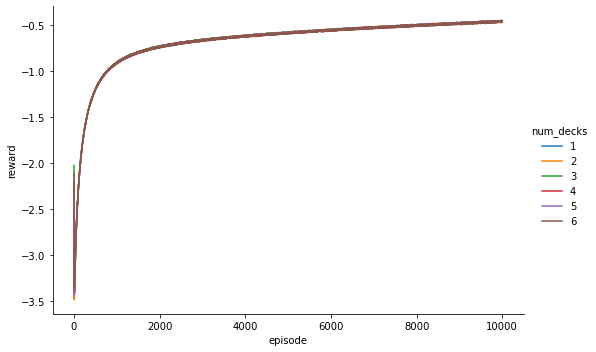

In [102]:
g = sns.relplot(x='episode', y='reward', hue='num_decks', data=ddf, kind='line', aspect=1.5)

## Epsilon

In [82]:
epsdf = rdf.groupby(['num_episodes', 'epsilon', 'episode'], as_index=False)[['reward', 'wins', 'winrate']].mean()

In [83]:
epsdf.head()

,num_episodes,epsilon,episode,reward,wins,winrate
0,10000,0.1,0,-2.412894,0.021948,2.194787
1,10000,0.1,1,-3.456643,0.069930,3.496503
2,10000,0.1,2,-3.813920,0.110795,3.693182
3,10000,0.1,3,-3.936691,0.176978,4.424460
4,10000,0.1,4,-3.996914,0.234222,4.684432


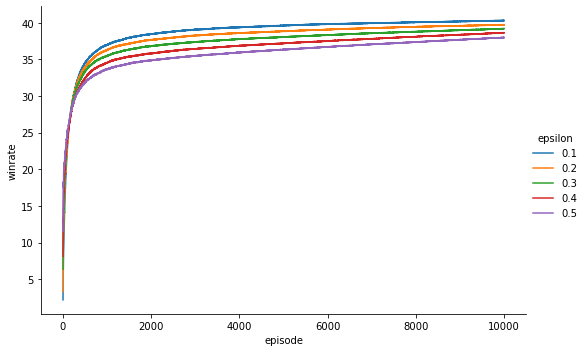

In [84]:
g = sns.relplot(x='episode', y='winrate', hue='epsilon', data=epsdf, kind='line', aspect=1.5)

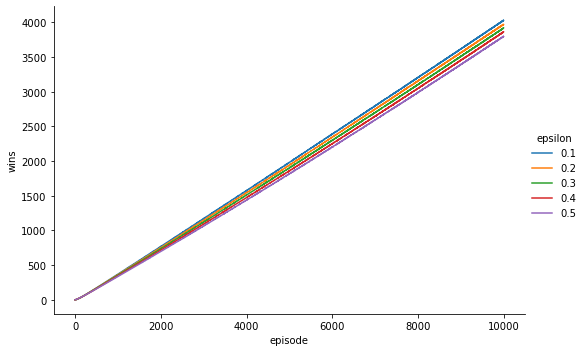

In [85]:
g = sns.relplot(x='episode', y='wins', hue='epsilon', data=epsdf, kind='line', aspect=1.5)

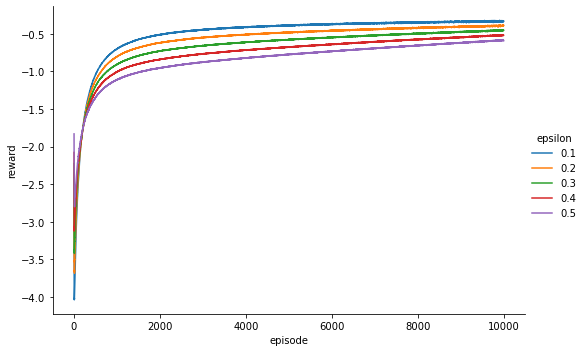

In [86]:
g = sns.relplot(x='episode', y='reward', hue='epsilon', data=epsdf, kind='line', aspect=1.5)

## Eta

In [87]:
etadf = rdf.groupby(['num_episodes', 'eta', 'episode'], as_index=False)[['reward', 'wins', 'winrate']].mean()

In [88]:
etadf.head()

,num_episodes,eta,episode,reward,wins,winrate
0,10000,0.1,0,-2.087886,0.068884,6.888361
1,10000,0.1,1,-2.850588,0.195294,9.764706
2,10000,0.1,2,-3.110843,0.332530,11.084337
3,10000,0.1,3,-3.150249,0.476309,11.907731
4,10000,0.1,4,-3.193953,0.606977,12.139535


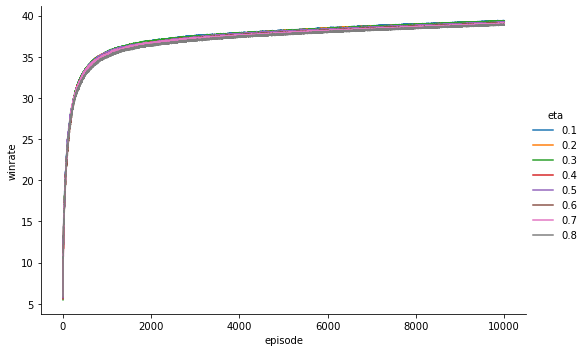

In [89]:
g = sns.relplot(x='episode', y='winrate', hue='eta', data=etadf, kind='line', aspect=1.5)

## Gamma

In [90]:
gdf = rdf.groupby(['num_episodes', 'gamma', 'episode'], as_index=False)[['reward', 'wins', 'winrate']].mean()

In [91]:
gdf.head()

,num_episodes,gamma,episode,reward,wins,winrate
0,10000,0.2,0,-2.276442,0.048077,4.807692
1,10000,0.2,1,-3.120438,0.128954,6.447689
2,10000,0.2,2,-3.244499,0.271394,9.046455
3,10000,0.2,3,-3.274621,0.424242,10.606061
4,10000,0.2,4,-3.317143,0.519048,10.380952


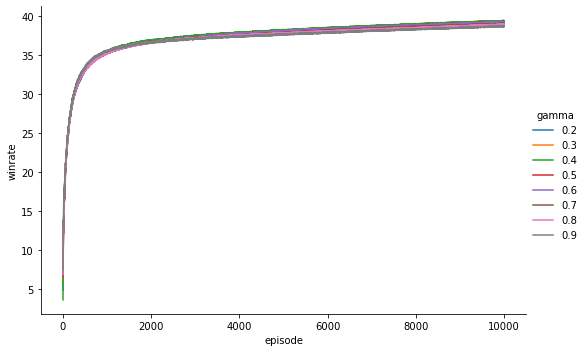

In [92]:
g = sns.relplot(x='episode', y='winrate', hue='gamma', data=gdf, kind='line', aspect=1.5)

## Actions

In [73]:
gdf = rdf.groupby(['num_episodes', 'gamma', 'episode'], as_index=False)[['reward', 'wins', 'winrate', 'action_num']].agg([sum, 'mean'])

In [74]:
gdf.columns = [f"{col}_{agg}" for col, agg in gdf.columns]

In [75]:
gdf.reset_index(inplace=True)

In [76]:
gdf.head()

,num_episodes,gamma,episode,reward_sum,reward_mean,wins_sum,wins_mean,winrate_sum,winrate_mean,action_num_sum,action_num_mean
0,10000,0.2,0,-947.00,-2.276442,20,0.048077,2000.0,4.807692,660,1.586538
1,10000,0.2,1,-1282.50,-3.120438,53,0.128954,2650.0,6.447689,639,1.554745
2,10000,0.2,2,-1327.00,-3.244499,111,0.271394,3700.0,9.046455,623,1.523227
3,10000,0.2,3,-1296.75,-3.274621,168,0.424242,4200.0,10.606061,608,1.535354
4,10000,0.2,4,-1393.20,-3.317143,218,0.519048,4360.0,10.380952,665,1.583333


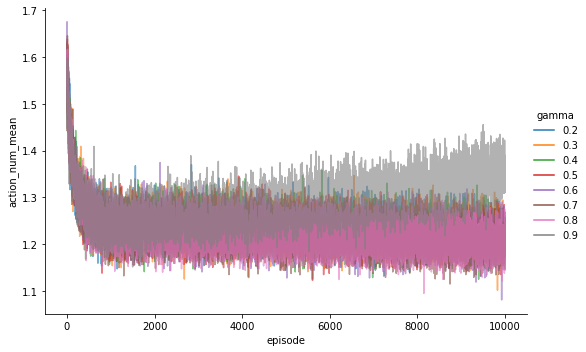

In [78]:
g = sns.relplot(x='episode', y='action_num_mean', hue='gamma', data=gdf, kind='line', aspect=1.5, alpha=0.6)